## 
- In ARIMA (AutoRegressive Integrated Moving Average) models, exogenous variables, often denoted as Xt, are external factors or predictors that are not part of the time series being analyzed but may influence it. These variables are used to enhance the forecasting performance of the model by incorporating additional information that can help explain the variability in the dependent variable.

- In a basic ARIMA model, only the past values of the time series itself are used to make forecasts. However, in the presence of exogenous variables, the ARIMA model becomes an ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) model.
Forecasting equation incorporates both the autoregressive (AR) terms and the moving average (MA) terms, as well as any exogenous variables if present.

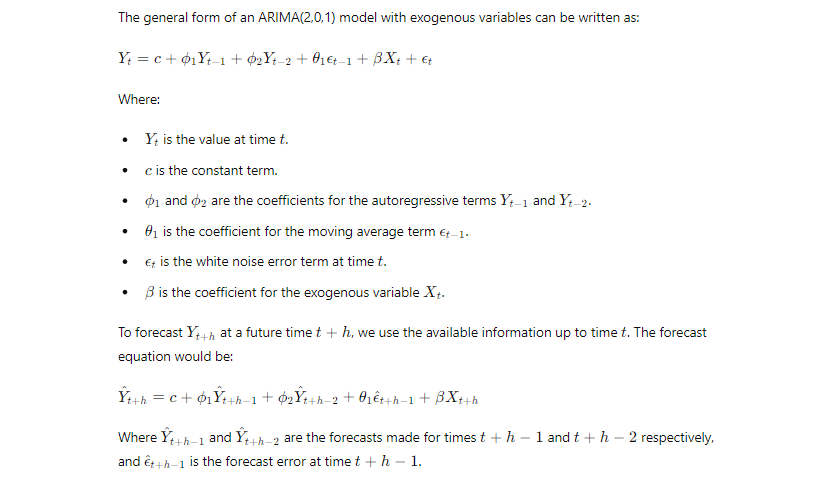

## Example Forecasting Equation for ARIMA(2,0,1) with Exogenous Variable
### Given the parameters of the model:



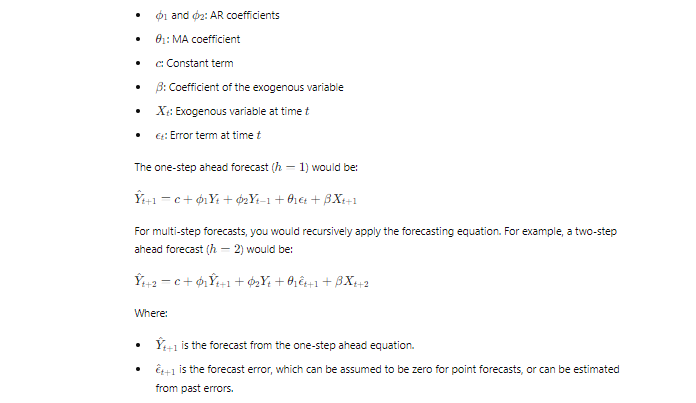

## Extracting the Forecast Equation
- To ensure the forecast equation matches the model's output exactly, you can extract the parameters from the fitted model and manually compute the forecast

!pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org --upgrade statsmodels
## ARIMA(2,1,1) with exogenous variables

In [10]:
# Install or update required libraries
#!pip install --upgrade statsmodels

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data
np.random.seed(0)
Y = np.random.randn(100)  # Your time series data
exog = np.random.randn(100)  # Your exogenous variable

# Fit the ARIMA(2,1,1) model
model = ARIMA(Y, order=(2,1,1), exog=exog)
model_fit = model.fit()

# Forecast for the next time point
exog_forecast = np.array([1.0])  # Replace with your future exogenous value
forecast = model_fit.get_forecast(steps=1, exog=exog_forecast.reshape(1, -1))
predicted_mean = forecast.predicted_mean

print(f"Forecasted value: {predicted_mean}")

# Extract fitted model parameters
params = model_fit.params
c = params[0]  # Extracting the constant term directly
phi1 = params[1]
phi2 = params[2]
theta1 = params[3]
beta = params[4]

# Get the last observed values
Y_t = Y[-1]
Y_t_minus_1 = Y[-2]
Y_t_minus_2 = Y[-3]
epsilon_t = model_fit.resid[-1]

# Manual forecast calculation
diff_Y_t = Y_t - Y_t_minus_1
diff_Y_t_minus_1 = Y_t_minus_1 - Y_t_minus_2

manual_forecast = Y_t + c + phi1 * diff_Y_t + phi2 * diff_Y_t_minus_1 + theta1 * epsilon_t + beta * exog_forecast[0]

print(f"Manual forecasted value: {manual_forecast}")


Forecasted value: [0.45392518]
Manual forecasted value: 1.5533403948815536


## Quick Practice: code for fitting an ARIMA(2,0,1) model with exogenous variables:

In [12]:
# Install or update required libraries
##!pip install --upgrade statsmodels

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data
np.random.seed(0)
Y = np.random.randn(100)  # Your time series data
exog = np.random.randn(100)  # Your exogenous variable

# Fit the ARIMA(2,0,1) model
model = ARIMA(Y, order=(2,0,1), exog=exog)
model_fit = model.fit()

# Forecast for the next time point
exog_forecast = np.array([1.0])  # Replace with your future exogenous value
forecast = model_fit.get_forecast(steps=1, exog=exog_forecast.reshape(1, -1))
predicted_mean = forecast.predicted_mean

print(f"Forecasted value: {predicted_mean}")

# Extract fitted model parameters
params = model_fit.params
c = params[0]  # Extracting the constant term directly
phi1 = params[1]
phi2 = params[2]
theta1 = params[3]
beta = params[4]

# Get the last observed values
Y_t = Y[-1]
Y_t_minus_1 = Y[-2]
epsilon_t = model_fit.resid[-1]

# Manual forecast calculation
manual_forecast = c + phi1 * Y_t + phi2 * Y_t_minus_1 + theta1 * epsilon_t + beta * exog_forecast[0]

print(f"Manual forecasted value: {manual_forecast}")


Forecasted value: [0.18363877]
Manual forecasted value: -0.028492474965091427
